In [3]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 9.8 MB/s eta 0:00:00:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.8 MB/s eta 0:00:00ta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 6.5 MB/s eta 0:00:0000:0100:01
  Created wheel for shap: filename=shap-0.47.1-cp313-cp313-macosx_10_13_universal2.whl size=592619 sha256=e0f8b761d12ea5d3651ddc52b6b9f3824aa4cb0f7dd89ffd2e66c051dca64b1c
  Stored in directory: /Users/stella/Library/Caches/pip/wheels/39/f6/66/a7c92182c58f07779158b5aa84b5c7ebff5cf8ceb2ffb6c353
Successfully built shap
Note: you may need to restart the kernel to use updated packages.


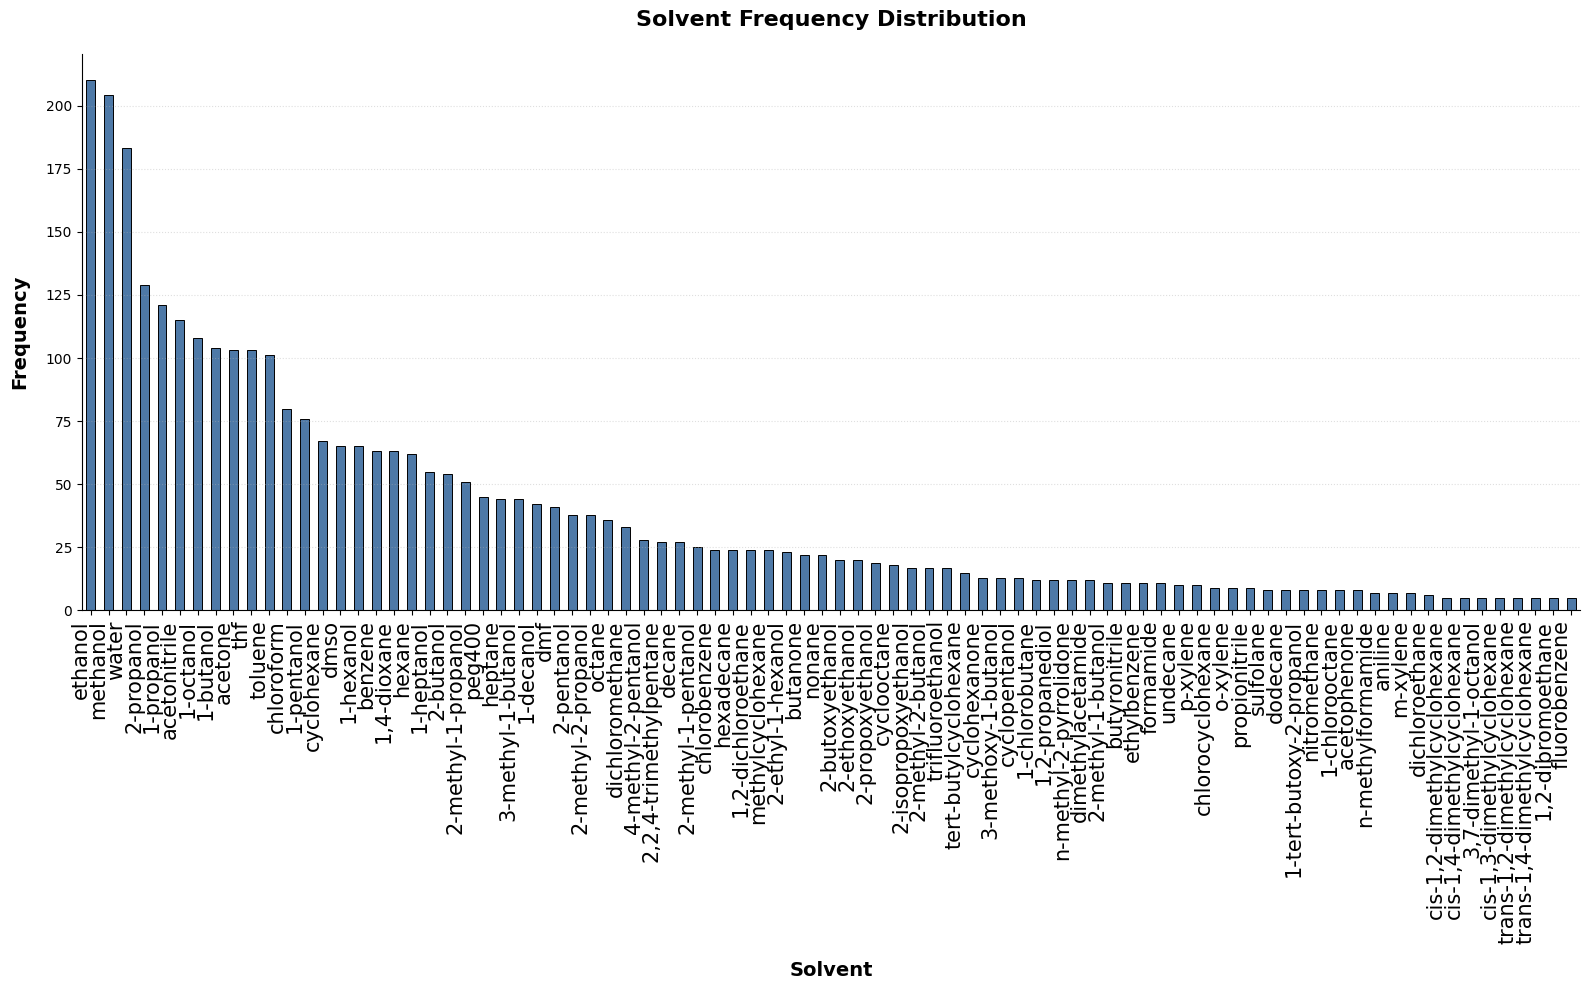

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
filepath = "/Users/stella/Downloads/tierney/project/all_final_data.csv"
df = pd.read_csv(filepath)

# Get solvent frequencies and sort
solvent_counts = df['Solvent'].value_counts().sort_values(ascending=False)

# Create figure with adjusted dimensions
plt.figure(figsize=(16, 10))  # Wider and taller for better label spacing

# Plot with custom styling
ax = solvent_counts.plot(kind='bar', 
                        color='#4e79a7',  # Professional blue
                        edgecolor='black',
                        linewidth=0.7,
                        width=0.5)  # Slightly narrower bars

# Axis Labels & Title
ax.set_xlabel('Solvent', fontsize=14, labelpad=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, labelpad=12, fontweight='bold')
ax.set_title('Solvent Frequency Distribution', 
             fontsize=16, pad=20, fontweight='bold')

# X-axis Label Formatting
ax.set_xticks(range(len(solvent_counts)))
ax.set_xticklabels(
    solvent_counts.index,
    rotation=90,  #  vertical
    ha='right',   # Right-aligned for diagonal
    fontsize=15,  # Slightly smaller but readable
    fontfamily='DejaVu Sans'  # Monospace for alignment
)

# Adjust spacing
plt.subplots_adjust(bottom=0.35)  # Extra space for diagonal labels

# Grid & Visual Polish
ax.yaxis.grid(True, linestyle=':', alpha=0.4)
ax.spines[['top', 'right']].set_visible(False)  # Cleaner look

plt.tight_layout()
plt.show()

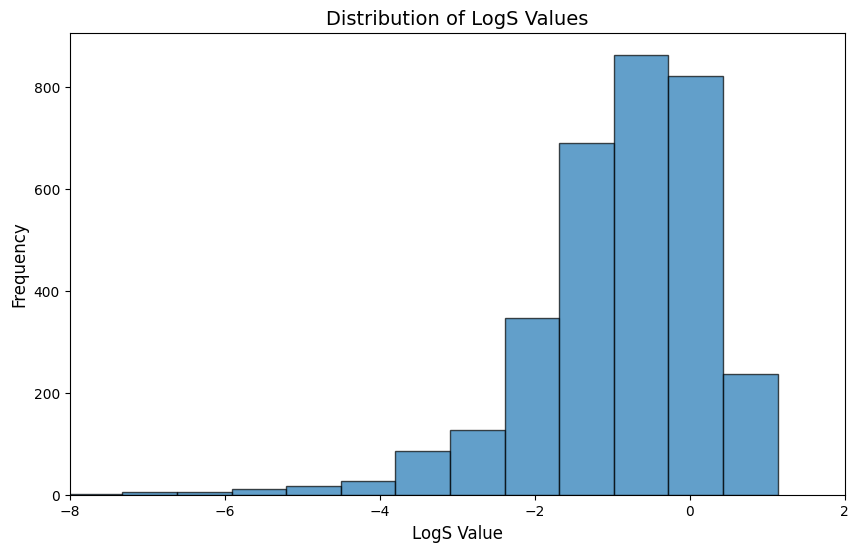

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load your CSV file
data = pd.read_csv('/Users/stella/Downloads/tierney/project/all_final_data.csv')

# Step 2: Check if 'logS' column exists (replace 'logS' with your actual column name if different)
if 'LogS' not in data.columns:
    print("Error: 'logS' column not found in the CSV file.")
    print("Available columns:", data.columns.tolist())
else:
    # Step 3: Create the histogram
    plt.figure(figsize=(10, 6))
    
    # You can adjust the number of bins as needed
    n, bins, patches = plt.hist(data['LogS'], bins=30, edgecolor='black', alpha=0.7)
    
    # Step 4: Add labels and title
    plt.xlabel('LogS Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of LogS Values', fontsize=14)
    plt.xlim(-8,2)  
    

    # Step 5: Show or save the plot
    plt.show()
    # To save: plt.savefig('logS_distribution.png', dpi=300, bbox_inches='tight')

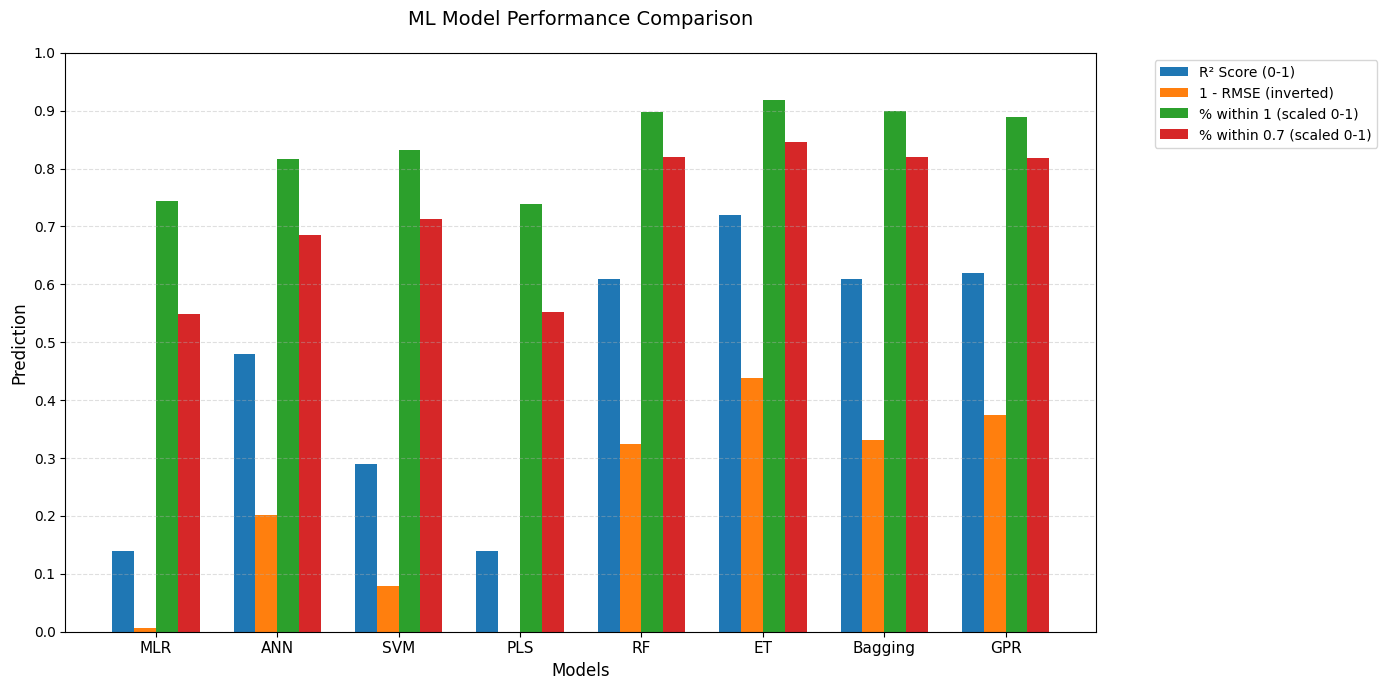

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['MLR', 'ANN', 'SVM', 'PLS', 'RF', 'ET', 'Bagging', 'GPR']
metrics = {
    'R2': [0.14, 0.48, 0.29, 0.14, 0.61, 0.72, 0.61, 0.62],
    'RMSE': [1.38, 1.11, 1.28, 1.39, 0.94, 0.78, 0.93, 0.87],
    '% within 1': [74.48, 81.62, 83.23, 73.90, 89.72, 91.81, 89.97, 88.92],
    '% within 0.7': [54.91, 68.61, 71.25, 55.19, 82.03, 84.55, 82.03, 81.78]
}

# Set up figure
plt.figure(figsize=(14, 7))

# Normalize metrics for comparison
x = np.arange(len(models))
width = 0.18  # Adjusted for 4 metrics

# Plot each metric (all normalized to "higher is better")
plt.bar(x - 1.5*width, metrics['R2'], width, label='R² Score', color='#1f77b4')
plt.bar(x - 0.5*width, [1 - (m/max(metrics['RMSE'])) for m in metrics['RMSE']], 
        width, label='1 - RMSE/max(RMSE)', color='#ff7f0e')
plt.bar(x + 0.5*width, [p/100 for p in metrics['% within 1']], 
        width, label='% within 1', color='#2ca02c')
plt.bar(x + 1.5*width, [p/100 for p in metrics['% within 0.7']], 
        width, label='% within 0.7', color='#d62728')

# Formatting
plt.xlabel('Models', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('ML Model Performance Comparison', fontsize=14, pad=20)
plt.xticks(x, models, fontsize=11)
plt.yticks(np.linspace(0, 1, 11), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Custom legend
legend_labels = [
    'R² Score (0-1)',
    '1 - RMSE (inverted)',
    '% within 1 (scaled 0-1)',
    '% within 0.7 (scaled 0-1)'
]
plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust layout and show
plt.tight_layout()
plt.show()

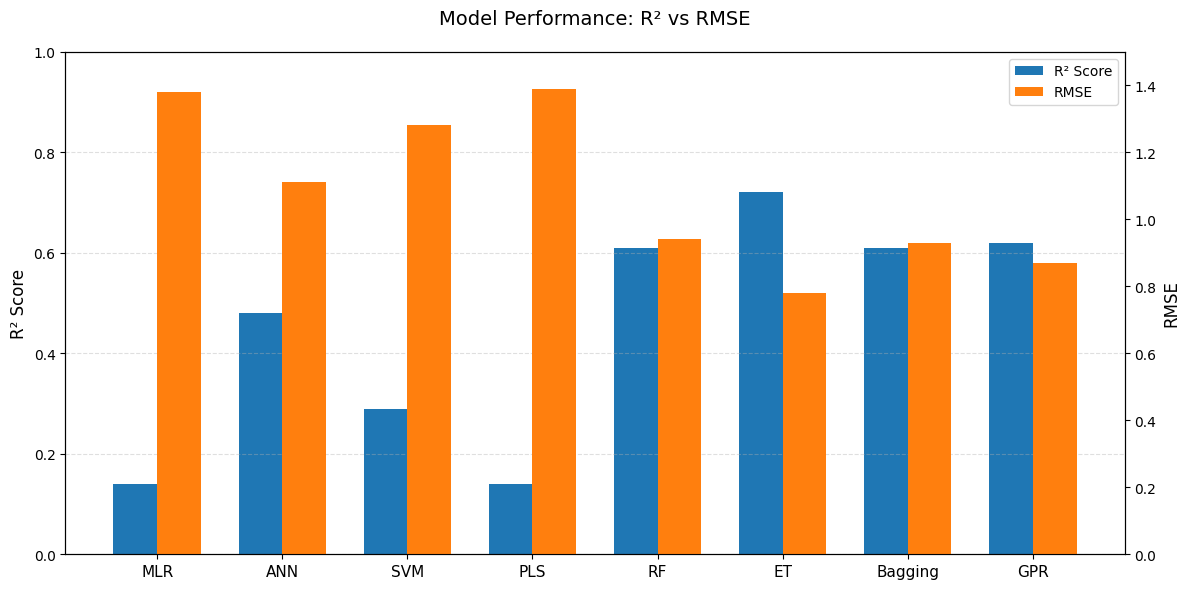

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['MLR', 'ANN', 'SVM', 'PLS', 'RF', 'ET', 'Bagging', 'GPR']
r2_scores = [0.14, 0.48, 0.29, 0.14, 0.61, 0.72, 0.61, 0.62]
rmse_scores = [1.38, 1.11, 1.28, 1.39, 0.94, 0.78, 0.93, 0.87]

# Create figure with dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar positions
x = np.arange(len(models))
width = 0.35

# Plot R² scores (left axis)
bars1 = ax1.bar(x - width/2, r2_scores, width, 
                color='#1f77b4', label='R² Score')
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Create second y-axis for RMSE
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, rmse_scores, width, 
                 color='#ff7f0e', label='RMSE')
ax2.set_ylabel('RMSE', fontsize=12)
ax2.set_ylim(0, 1.5)

# Add titles and labels
plt.title('Model Performance: R² vs RMSE', fontsize=14, pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

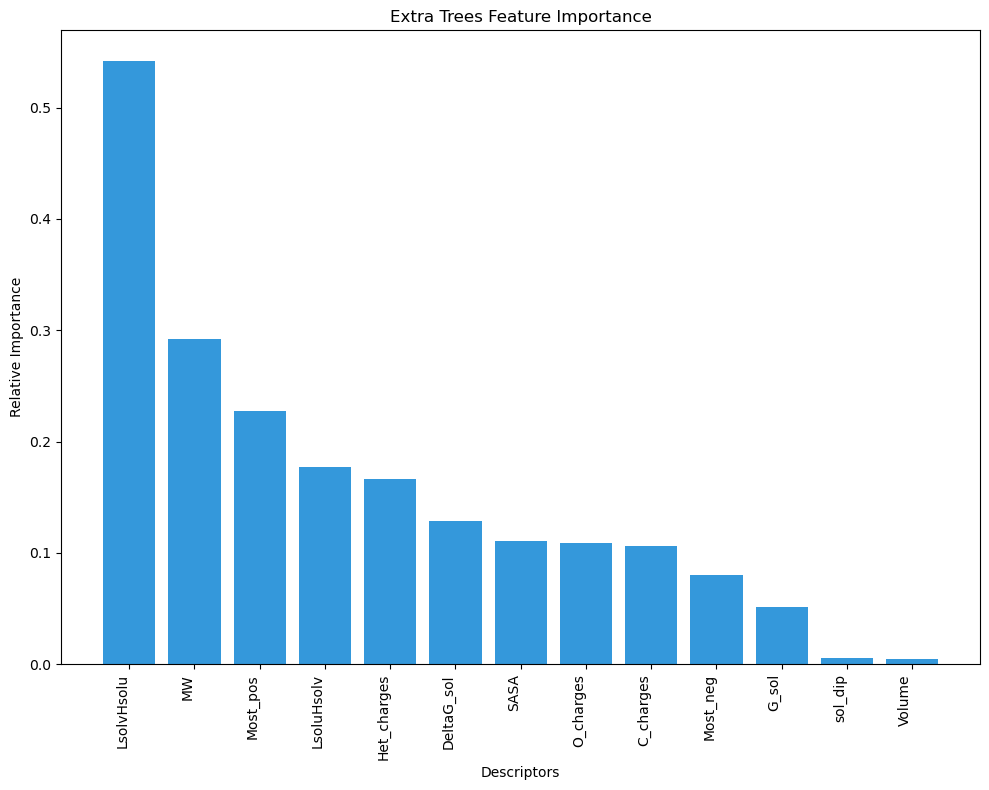

Feature Importance Ranking:
| Feature     |   Importance |     Std Dev |
|:------------|-------------:|------------:|
| LsolvHsolu  |   0.542251   | 0.0418769   |
| MW          |   0.292324   | 0.018119    |
| Most_pos    |   0.227068   | 0.0111323   |
| LsoluHsolv  |   0.177215   | 0.00904397  |
| Het_charges |   0.166124   | 0.00591407  |
| DeltaG_sol  |   0.128402   | 0.016372    |
| SASA        |   0.110829   | 0.0100179   |
| O_charges   |   0.108841   | 0.00516901  |
| C_charges   |   0.106525   | 0.00944404  |
| Most_neg    |   0.0804993  | 0.00283094  |
| G_sol       |   0.0514268  | 0.002261    |
| sol_dip     |   0.00557632 | 0.000189694 |
| Volume      |   0.00516119 | 0.00048837  |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

# 1. Load your data
data = pd.read_csv("/Users/stella/Downloads/tierney/project/all_final_data.csv")

# 2. Prepare features and target
features = ['MW', 'Volume', 'G_sol', 'DeltaG_sol', 'sol_dip',
           'LsoluHsolv', 'LsolvHsolu', 'SASA', 'O_charges',
           'C_charges', 'Most_neg', 'Most_pos', 'Het_charges']
X = data[features]
y = data['LogS']  # Make sure this matches your target column name

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train ET model (using same parameters as your CV)
et_model = ExtraTreesRegressor(n_estimators=500, random_state=42)
et_model.fit(X_scaled, y)

# 5. Calculate permutation importance
perm_importance = permutation_importance(
    et_model, 
    X_scaled, 
    y, 
    n_repeats=10, 
    random_state=42
)

# 6. Create visualization with vertical bars
plt.figure(figsize=(10, 8))  # Adjusted for better vertical layout
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Create vertical bar plot (no error bars)
plt.bar(
    np.array(features)[sorted_idx],
    perm_importance.importances_mean[sorted_idx],
    color='#3498db'
)

plt.ylabel('Relative Importance')
plt.xlabel('Descriptors')
plt.title('Extra Trees Feature Importance')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig('ET_feature_importance_vertical.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Create importance table (unchanged)
importance_df = pd.DataFrame({
    'Feature': np.array(features)[sorted_idx],
    'Importance': perm_importance.importances_mean[sorted_idx],
    'Std Dev': perm_importance.importances_std[sorted_idx]
})

print("Feature Importance Ranking:")
print(importance_df.to_markdown(index=False))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

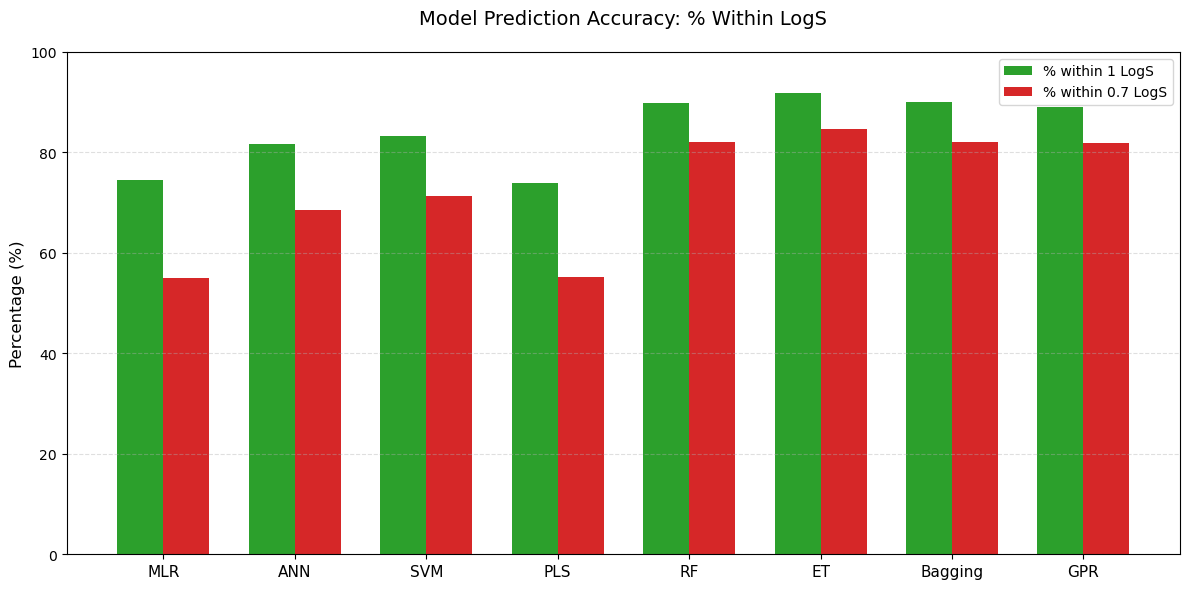

In [9]:
# Data for percentage metrics
within_1 = [74.48, 81.62, 83.23, 73.90, 89.72, 91.81, 89.97, 88.92]
within_07 = [54.91, 68.61, 71.25, 55.19, 82.03, 84.55, 82.03, 81.78]

models = ['MLR', 'ANN', 'SVM', 'PLS', 'RF', 'ET', 'Bagging', 'GPR']

# Create figure
plt.figure(figsize=(12, 6))

# Bar positions
x = np.arange(len(models))
width = 0.35

# Plot both percentage metrics
bars1 = plt.bar(x - width/2, within_1, width, 
                color='#2ca02c', label='% within 1 LogS')
bars2 = plt.bar(x + width/2, within_07, width, 
                color='#d62728', label='% within 0.7 LogS')

# Formatting
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.title('Model Prediction Accuracy: % Within LogS', fontsize=14, pad=20)
plt.xticks(x, models, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(fontsize=10)

# Add value labels if desired (commented out)
# for bar in bars1:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height,
#              f'{height:.1f}', ha='center', va='bottom')
# for bar in bars2:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height,
#              f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

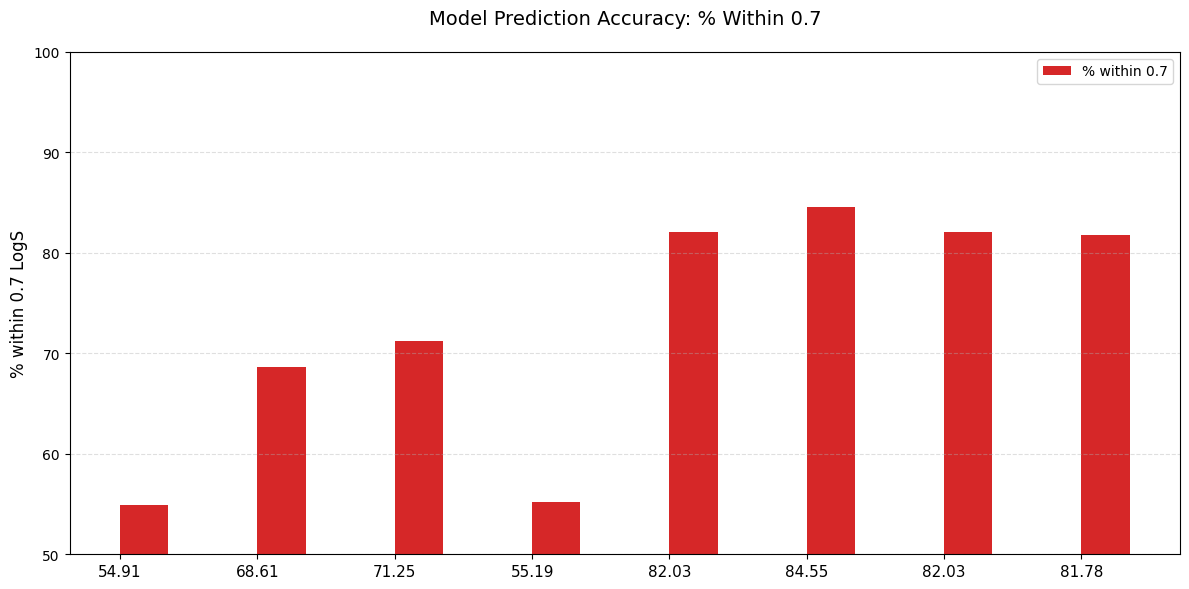

In [ ]:
# Data for percentage metrics
within_07 = [54.91, 68.61, 71.25, 55.19, 82.03, 84.55, 82.03, 81.78]

# Create figure
plt.figure(figsize=(12, 6))
features = ['MW', 'Volume', 'G_sol', 'DeltaG_sol', 'sol_dip',
           'LsoluHsolv', 'LsolvHsolu', 'SASA', 'O_charges',
           'C_charges', 'Most_neg', 'Most_pos', 'Het_charges']
X = data[features]

# Bar positions
x = np.arange(len(within_07))
width = 0.35

# Plot both percentage metrics
bars2 = plt.bar(x + width/2, within_07, width, 
                color='#d62728', label='% within 0.7')

# Formatting
plt.ylabel('% within 0.7 LogS', fontsize=12)
plt.ylim(50, 100)
plt.title('Model Prediction Accuracy: % Within 0.7', fontsize=14, pad=20)
plt.xticks(x, within_07, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

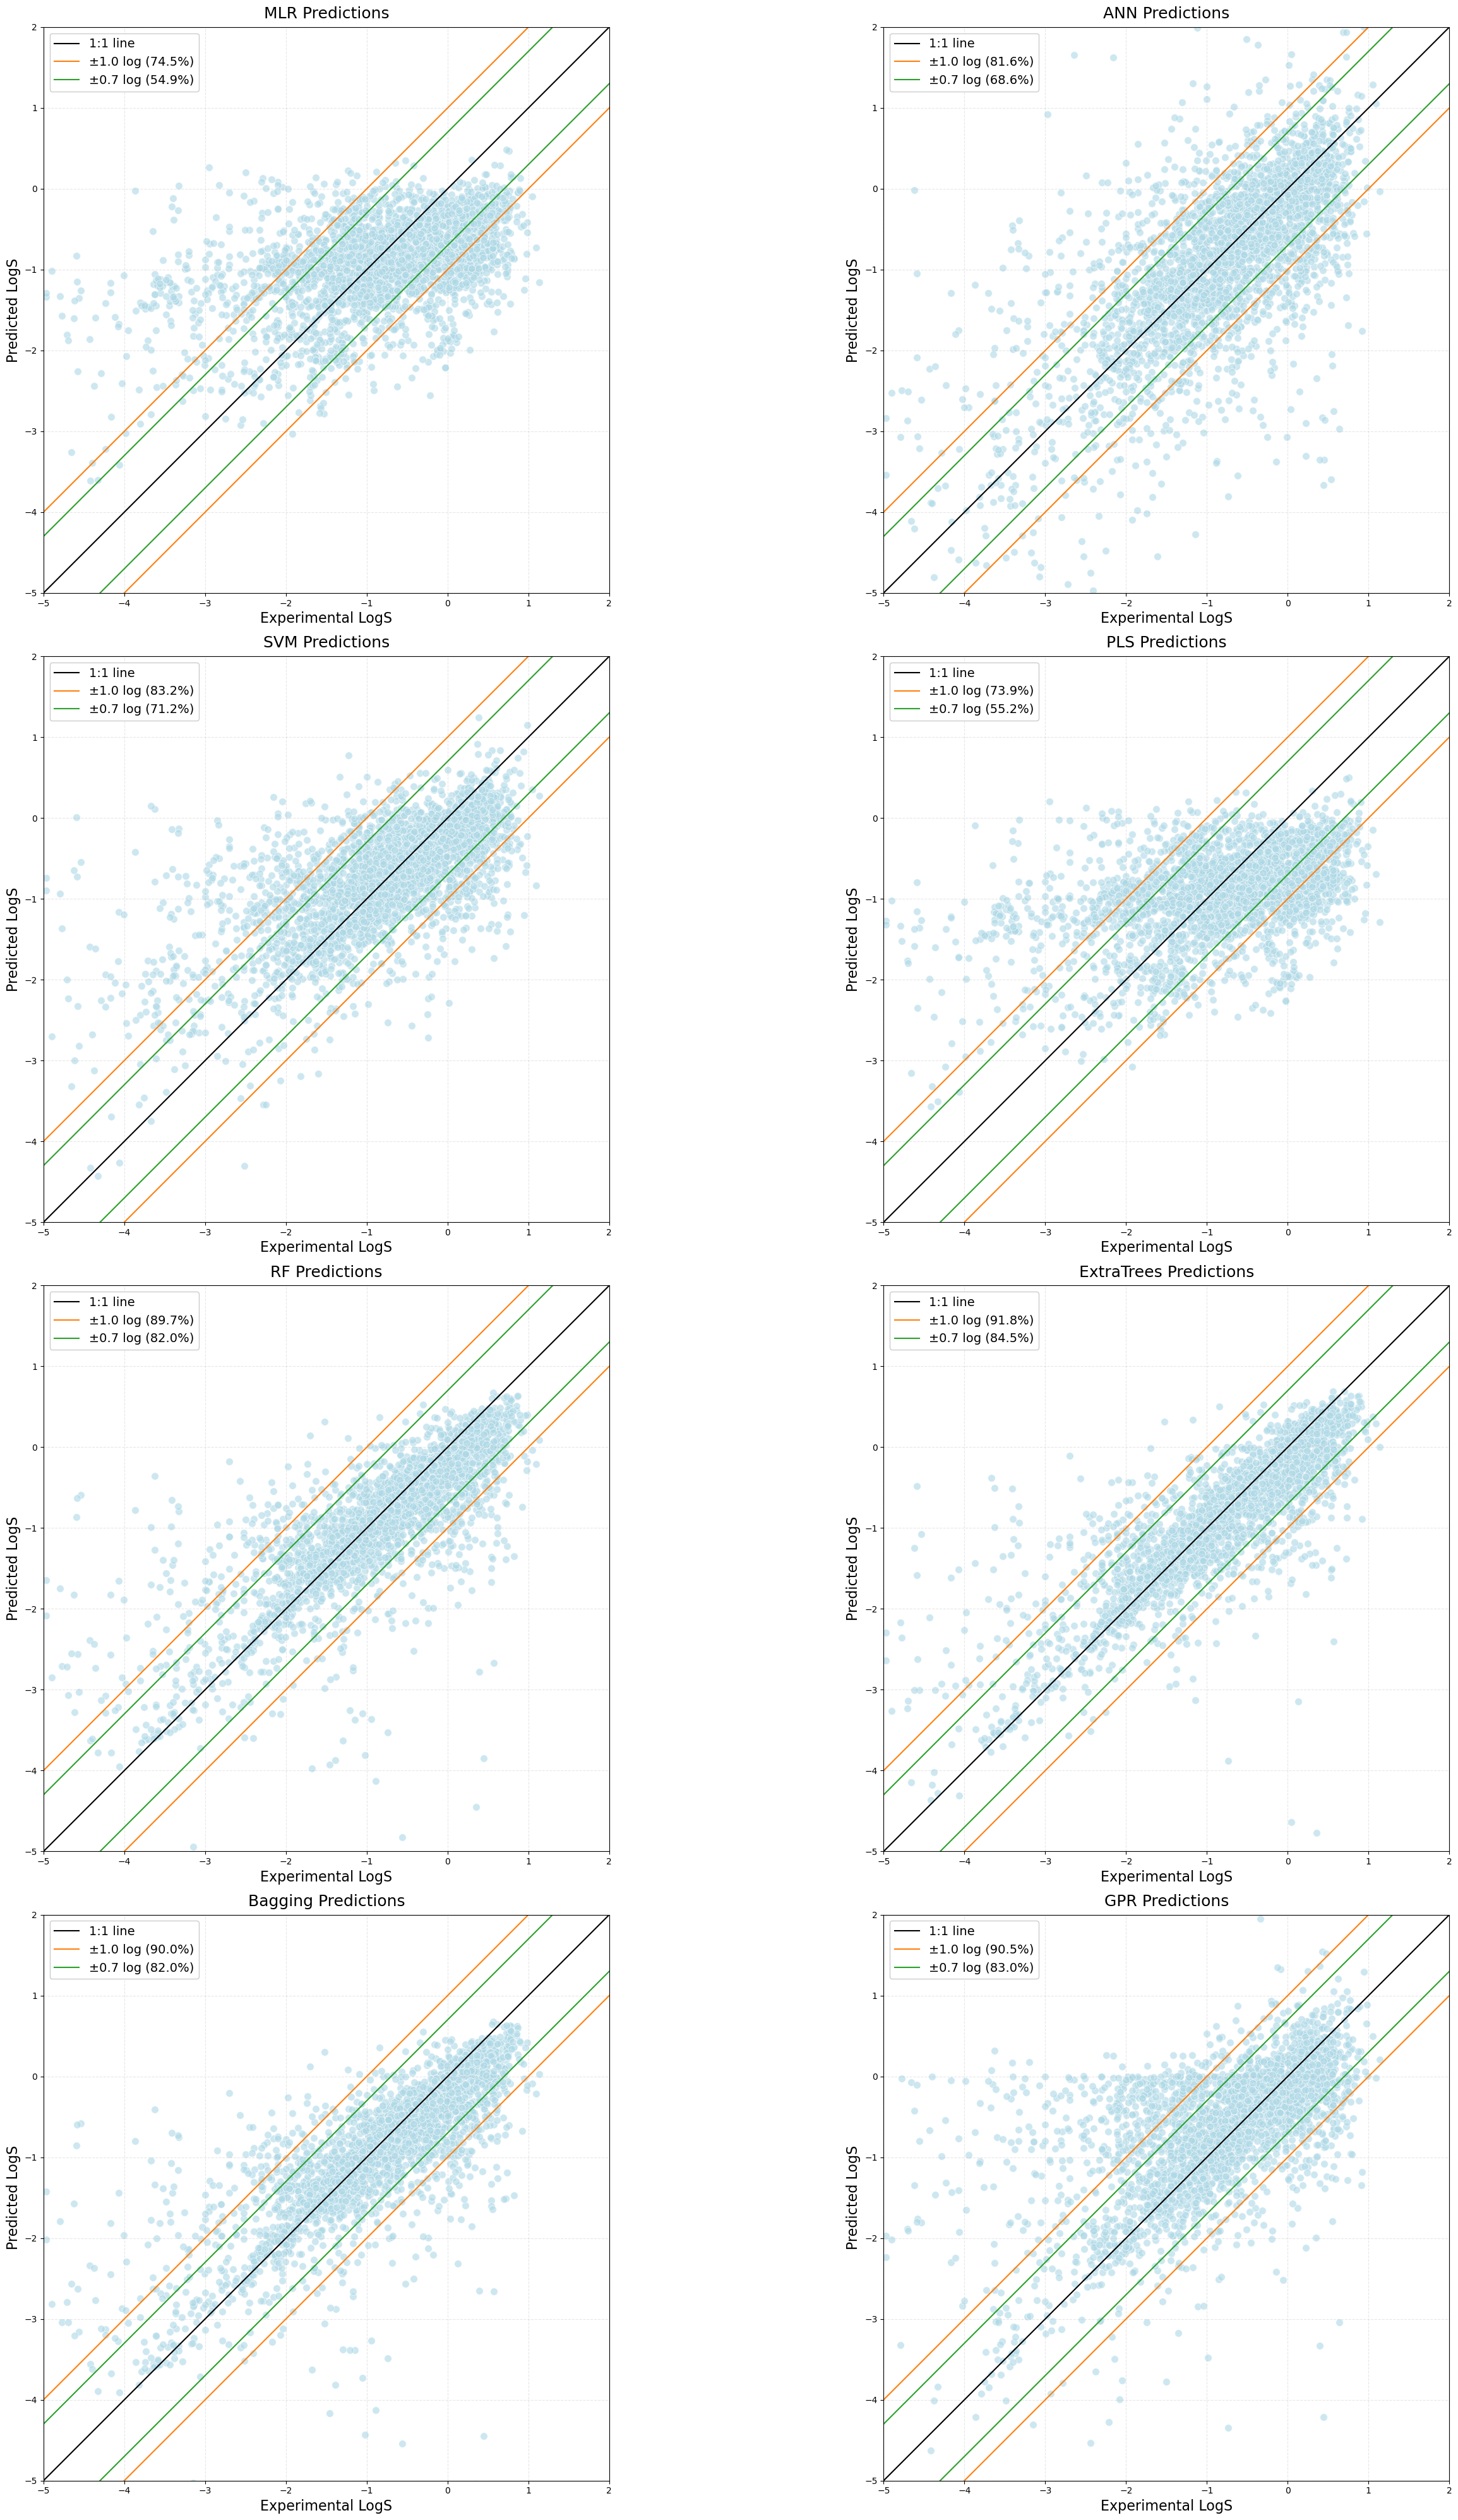

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
predictions_df = pd.read_csv("/Users/stella/Downloads/tierney/project/all_predictions.csv")
metrics_data = {
    "MLR": {"within_1": 74.48, "within_0.7": 54.91},
    "ANN": {"within_1": 81.62, "within_0.7": 68.61},
    "SVM": {"within_1": 83.23, "within_0.7": 71.25},
    "PLS": {"within_1": 73.90, "within_0.7": 55.19},
    "RF": {"within_1": 89.72, "within_0.7": 82.03},
    "ExtraTrees": {"within_1": 91.81, "within_0.7": 84.55},
    "Bagging": {"within_1": 89.97, "within_0.7": 82.03},
    "GPR": {"within_1": 90.5, "within_0.7": 83.0},
}

# Create a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure with 8 subplots
fig, axes = plt.subplots(4, 2, figsize=(30, 40))
axes = axes.flatten()

# Plot each model
for i, (model, metrics) in enumerate(metrics_data.items()):
    ax = axes[i]
    
    # Get experimental and predicted values
    x = predictions_df['Experimental']
    y = predictions_df[model]
    
    # Scatter plot
    sns.scatterplot(x=x, y=y, ax=ax, alpha=0.6, color='lightblue', s=70)
    
    # Add 1:1 line
    ax.plot([-10, 5], [-10, 5], 'k-', linewidth=1.5, label='1:1 line')
    
    # ±1.0 log unit thresholds
    ax.plot([-10, 5], [-9, 6], 
             '-', color=custom_palette[1], linewidth=1.5, 
             label=f'±1.0 log ({metrics["within_1"]:.1f}%)')
    ax.plot([-10, 5], [-11, 4], 
             '-', color=custom_palette[1], linewidth=1.5)
    
    # ±0.7 log unit thresholds
    ax.plot([-10, 5], [-9.3, 5.7], 
             '-', color=custom_palette[2], linewidth=1.5, 
             label=f'±0.7 log ({metrics["within_0.7"]:.1f}%)')
    ax.plot([-10, 5], [-10.7, 4.3], 
             '-', color=custom_palette[2], linewidth=1.5)
    
    # Set titles and labels
    ax.set_title(f'{model} Predictions', fontsize=18, pad=10)
    ax.set_xlabel('Experimental LogS', fontsize=16)
    ax.set_ylabel('Predicted LogS', fontsize=16)
    
    # Set axis limits
    ax.set_xlim(-5, 2)
    ax.set_ylim(-5, 2)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Add legend
    ax.legend(fontsize=14, framealpha=1)
    
    # Set equal aspect ratio
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()